### College Admission Prediction Using Logistic Regression

#### Every year high school student and college students apply to various universities and programs. Each student has a unique set of test scores, grades, and backgrounds. Somehow, the admission commitees must decide which applicants to accept or reject from their program. In this case a binary classification algorithm can be used to accept or reject applicants. To grasp the concepts of classification, we'll try to predict whether an applicant will be admitted to a graduate program in a U.S. university.

#### We'll be working with a dataset containing data on 644 applicants with the following columns:

- gre - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students.
- Score ranges from 200 to 800.
- gpa - college grade point average.
- Continuous between 0.0 and 4.0.
- admit - binary value

#### Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.

#### While we can use both the gpa and gre columns to predict the admit column, we'll focus on using just the gpa column to keep things simple. Let's read the data into Pandas and visualize the relationship between gpa and admit.

### Visualize data

In [1]:
# Read admissions.csv into a Dataframe named admissions.
# Use the Matplotlib method scatter to generate a scatter plot with the:
# gpa column on the x-axis.
# admit column on the y-axis.
# Use plt.show() to display the scatter plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
admissions = pd.read_csv("admissions.csv")
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


In [2]:
# normalize gre
gre_min = admissions['gre'].min()
gre_max = admissions['gre'].max()
admissions['gre_norm'] = (admissions['gre'] - gre_min) / (gre_max - gre_min)
admissions.head()

,admit,gpa,gre,gre_norm
0,0,3.177277,594.102992,0.497366
1,0,3.412655,631.528607,0.588729
2,0,2.728097,553.714399,0.398770
3,0,3.093559,551.089985,0.392364
4,0,3.141923,537.184894,0.358419


In [3]:
# normalize gpa
gpa_min = admissions['gpa'].min()
gpa_max = admissions['gpa'].max()
admissions['gpa_norm'] = (admissions['gpa'] - gpa_min) / (gpa_max - gpa_min)
admissions.head()

,admit,gpa,gre,gre_norm,gpa_norm
0,0,3.177277,594.102992,0.497366,0.548674
1,0,3.412655,631.528607,0.588729,0.677797
2,0,2.728097,553.714399,0.398770,0.302264
3,0,3.093559,551.089985,0.392364,0.502748
4,0,3.141923,537.184894,0.358419,0.529279


Text(0,0.5,'GPA Normalized')

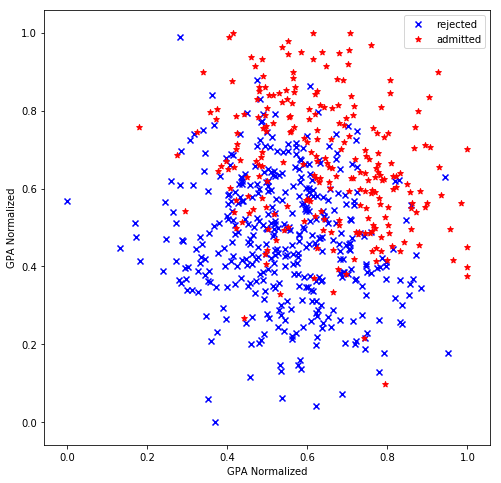

In [4]:
# scatter plot using gpa as x, gre as y, admit as o, reject as x
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(admissions.loc[admissions['admit']==0, ['gpa_norm']], admissions.loc[admissions['admit']==0, ['gre_norm']], c='b', marker='x', label='rejected')
ax.scatter(admissions.loc[admissions['admit']==1, ['gpa_norm']], admissions.loc[admissions['admit']==1, ['gre_norm']], c='r', marker='*', label='admitted')
ax.legend()
plt.xlabel('GPA Normalized')
plt.ylabel('GPA Normalized')

#### There seems to be a straight line that can seperate the rejected class and admittted class, but with certian amount of data overlapping.

#### Let's check the each feature vs target

Text(0.5,0,'GRE Normalized')

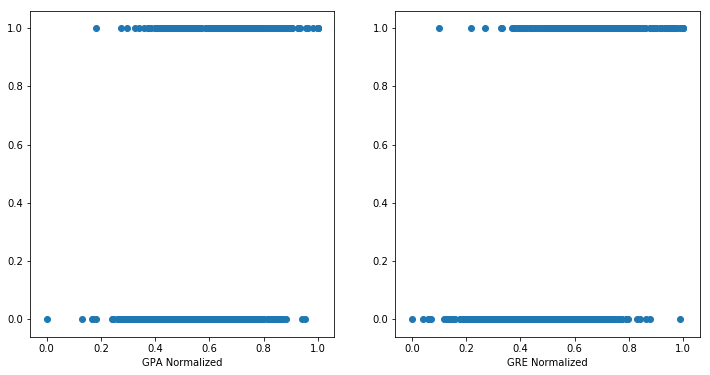

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,2,1)
ax.scatter(admissions['gpa_norm'], admissions['admit'])
ax.set_xlabel('GPA Normalized')
ax = fig.add_subplot(1,2,2)
ax.scatter(admissions['gre_norm'], admissions['admit'])
ax.set_xlabel('GRE Normalized')

### Training the model

In [6]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[['gpa_norm', 'gre_norm']], admissions['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Make a continuous grid of values and evaluate the probability of each (x, y) point in the grid

Text(0.5,1,'Logistic Regression Decision Boundary')

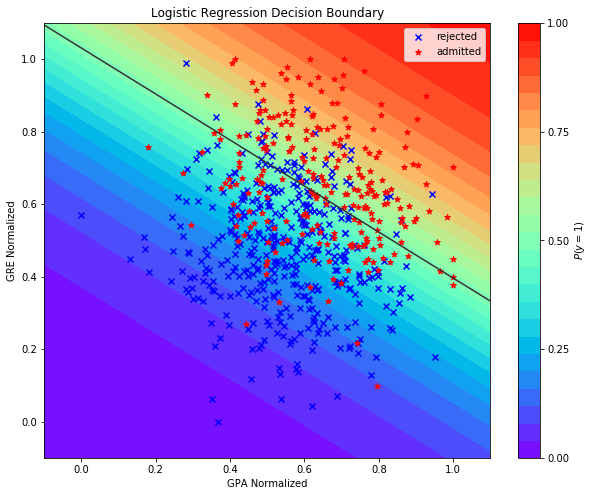

In [7]:
xx, yy = np.mgrid[-0.1:1.1:.01, -0.1:1.1:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logistic_model.predict_proba(grid)[:, 1].reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="rainbow",
                      vmin=0, vmax=1)
ax_c = fig.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(admissions.loc[admissions['admit']==0, ['gpa_norm']], admissions.loc[admissions['admit']==0, ['gre_norm']], c='b', marker='x', label='rejected')
ax.scatter(admissions.loc[admissions['admit']==1, ['gpa_norm']], admissions.loc[admissions['admit']==1, ['gre_norm']], c='r', marker='*', label='admitted')
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
#ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6, label = 'decision boundary')
plt.legend()
plt.xlabel('GPA Normalized')
plt.ylabel('GRE Normalized')
plt.title('Logistic Regression Decision Boundary')

#### The decision boudary is shown as a stright line as in figure above

#### Fit the data using our model

In [8]:
fitted_labels = logistic_model.predict(admissions[['gpa_norm', 'gre_norm']])
fitted_labels

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### Evaluation

#### The simplest way to determine the effectiveness of a classification model is prediction accuracy. Accuracy helps us answer the question:
- What fraction of the predictions were correct (actual label matched predicted label)?

#### Prediction accuracy boils down to the number of labels that were correctly predicted divided by the total number of observations

#### In logistic regression,the model's output is a probability between 0 and 1. To decide who gets admitted, we set a threshold and accept all of the students where their computed probability exceeds that threshold. This threshold is called the discrimination threshold and scikit-learn sets it to 0.5 by default when predicting labels. If the predicted probability is greater than 0.5, the label for that observation is 1. If it is instead less than 0.5, the label for that observation is 0.

#### An accuracy of 1.0 means that the model predicted 100% of admissions correctly for the given discrimination threshold. An accuracy of 0.2 means that the model predicted 20% of the admissions correctly. 

#### The accuracy doesn't tell us how the model performs on data it wasn't trained on. A model that returns a 100% accuracy when evaluated on it's training set doesn't tell us how well the model works on data it's never seen before (and wasn't trained on). Accuracy also doesn't help us discriminate between the different types of outcomes a binary classification model can make. 

#### By segmenting a model's predictions into these different outcome categories, we can start to think about other measures of effectiveness that give us more granularity than simple accuracy.

#### We can define these outcomes as:

- True Positive - The model correctly predicted that the student would be admitted.

   - Said another way, the model predicted that the label would be Positive, and that ended up being True.
        In our case, Positive refers to being admitted and maps to the label 1 in the dataset.
        For this dataset, a true positive is whenever predicted_label is 1 and actual_label is 1.

- True Negative - The model correctly predicted that the student would be rejected.

   - Said another way, the model predicted that the label would be Negative, and that ended up being True.
        In our case, Negative refers to being rejected and maps to the label 0 in the dataset.
        For this dataset, a true negative is whenever predicted_label is 0 and actual_label is 0.
- False Positive - The model incorrectly predicted that the student would be admitted even though the student was actually rejected.

   - Said another way, the model predicted that the label would be Positive, but that was False (the actual label was False).
        For this dataset, a false positive is whenever predicted_label is 1 but the actual_label is 0.
        
- False Negative - The model incorrectly predicted that the student would be rejected even though the student was actually admitted.

   - Said another way, the model predicted that the would be Negative, but that was False (the actual value was True).
        For this dataset, a false negative is whenever predicted_label is 0 but the actual_label is 1.

In [10]:
admissions["predicted_label"] = fitted_labels
admissions.head()

,admit,gpa,gre,gre_norm,gpa_norm,predicted_label
0,0,3.177277,594.102992,0.497366,0.548674,0
1,0,3.412655,631.528607,0.588729,0.677797,0
2,0,2.728097,553.714399,0.398770,0.302264,0
3,0,3.093559,551.089985,0.392364,0.502748,0
4,0,3.141923,537.184894,0.358419,0.529279,0


### Accuracy

In [12]:
admissions["actual_label"] = admissions["admit"]
matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admissions)
print('Accuracy: {}%'.format(accuracy))

   admit       gpa         gre  gre_norm  gpa_norm  predicted_label  \
0      0  3.177277  594.102992  0.497366  0.548674                0   
1      0  3.412655  631.528607  0.588729  0.677797                0   
2      0  2.728097  553.714399  0.398770  0.302264                0   
3      0  3.093559  551.089985  0.392364  0.502748                0   
4      0  3.141923  537.184894  0.358419  0.529279                0   

   actual_label  
0             0  
1             0  
2             0  
3             0  
4             0  
Accuracy: 0.7857142857142857%


### True positive & True negative

In [13]:
# Extract all of the rows where predicted_label and actual_label both equal 1. 
# Then, calculate the number of true positives and assign to true_positives.
# Extract all of the rows where predicted_label and actual_label both equal 0. 
# Then, calculate the number of true negatives and assign to true_negatives.
# Display both true_positives and true_negatives.
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

print('True positives: {}'.format(true_positives))
print('True negatives: {}'.format(true_negatives))

True positives: 149
True negatives: 357


### Sensitivity

#### Let's now look at a few measures that are much more insightful than simple accuracy. Let's start with sensitivity:

- Sensitivity or True Positive Rate 
    - The proportion of applicants that were correctly admitted
    
#### Of all of the students that should have been admitted (True Positives + False Negatives), what fraction did the model correctly admit (True Positives)? More generally, this measure helps us answer the question:

- How effective is this model at identifying positive outcomes?

#### In our case, the positive outcome (label of 1) is admitting a student. If the True Positive Rate is low, it means that the model isn't effective at catching positive cases. For certain problems, high sensitivity is incredibly important. If we're building a model to predict which patients have cancer, every patient that is missed by the model could mean a loss of life. We want a highly sensitive model that is able to "catch" all of the positive cases (in this case, the positive case is a patient with cancer).

In [14]:
# Calculate the number of false negatives (where the model predicted rejected 
# but the student was actually admitted) and assign to false_negatives.
# Calculate the sensitivity and assign the computed value to sensitivity.
# Display sensitivity.
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
sensitivity = true_positives / (true_positives + false_negatives)
print('Sensitivity: {}'.format(sensitivity))

Sensitivity: 0.610655737704918


#### Looks like the sensitivity of the model is around 61% and only about 6 in 10 students that should have been admitted were actually admitted. In the context of predicting student admissions, this probably isn't too bad of a thing. Graduate schools can only admit a select number of students into their programs and by definition they end up rejecting many qualified students that would have succeeded.

#### In the healthcare context, however, low sensitivity could mean a severe loss of life. If a classification model is only catching 61% of positive cases for an illness, then around 4 of 10 people are going undiagnosed (being classified as false negatives). Hopefully you're beginning to acquire a sense for the tradeoffs predictive models make and the importance of understanding the various measures.

### Specificity

#### Let's now learn about specificity:
- Specificity or True Negative Rate 
    - The proportion of applicants that were correctly rejected

#### This helps us answer the question:
- How effective is this model at identifying negative outcomes?

#### In our case, the specificity tells us the proportion of applicants who should be rejected (actual_label equal to 0, which consists of False Positives + True Negatives) that were correctly rejected (just True Negatives). A high specificity means that the model is really good at predicting which applicants should be rejected.

In [15]:
# Calculate the number of false positives (where the model predicted 
# admitted but the student was actually rejected) and assign to false_positives.
# Calculate the specificity and assign the computed value to specificity.
# Display specificity.
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])
false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])
specificity = (true_negatives) / (false_positives + true_negatives)
print('Specificity: {}'.format(specificity))

Specificity: 0.8925


#### It looks like the specificity of the model is 89.25%. This means that the model is really good at knowing which applicants to reject. Since around only 11% of applicants were accepted that applied, it's important that the model reject people correctly who wouldn't have otherwise been accepted.

#### In this project, we learned about some of the different ways of evaluating how well a binary classification model performs. The different measures we learned about have very similar names and it's easy to confuse them.

#### Using Scikit-learn function to get accuracy:

In [16]:
logistic_model.score(admissions[['gpa_norm', 'gre_norm']], admissions['admit'])

0.7857142857142857

#### The accuracy of our model is about 0.79